In [11]:
import pandas as pd
import numpy as np

import nltk,sys
import numpy as np,pandas as pd
import matplotlib.pyplot as plt 
import nltk.data
from nltk.stem.porter import *
pd.set_option('display.max_colwidth', 500)


In [12]:
df = pd.read_csv("andrewng.csv")

In [13]:
tweets = pd.DataFrame()
tweets["tweet_text_processed"] = df["tweet"]

In [14]:
# Load the regular expression library
import re
# Remove punctuation
tweets['tweet_text_processed'] = tweets["tweet_text_processed"].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
tweets['tweet_text_processed']  = tweets['tweet_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
tweets['tweet_text_processed'].head()

0    our new natural language processing specialization’s first two courses are now on @coursera you’ll build your technical foundations and work on projects ranging from sentiment analysis to language modeling to autocomplete check it out: \n https://wwwcourseraorg/specializations/natural-language-processingutm_source=deeplearningai&utm_medium=institutions&utm_content=nlp_0617_ng … pictwittercom/rwf5nuslhp
1                                                                                                                               congratulations the #stanford2020 class that just graduated today an online commencement wasn't what anyone had envisioned but i am excited to see what you will accomplish and the contributions you'll make to this chaotic world proud of all of you  https://commencementstanfordedu/ 
2                                                                                                                                                                                 

In [15]:
def find_retweeted(tweet):
    '''This function will extract the twitter handles of retweed people'''
    return re.findall('(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

def find_mentioned(tweet):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)  

def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)   

In [16]:
def remove_links(tweet):
    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = re.sub(r'pictwittercom/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

In [17]:
import nltk
my_stopwords = nltk.corpus.stopwords.words('english')
# word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'
# cleaning master function
def clean_tweet(tweet, bigrams=True):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)

    tweet = tweet.lower() # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
#     tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
    tweet_token_list = [word for word in tweet.split(' ')
                            if word not in my_stopwords] # remove stopwords
#     tweet_token_list = [word_rooter(word) if '#' not in word else word
#                         for word in tweet_token_list] # apply word rooter
#     if bigrams:
#         tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
#                                             for i in range(len(tweet_token_list)-1)]
    tweet = ' '.join(tweet_token_list)
    return tweet
tweets['tweet_text_processed'] = tweets.tweet_text_processed.apply(clean_tweet)

In [18]:
tweets["tweet_text_processed"].to_csv("andrew.txt",header=False,index=False)

In [19]:
from pymongo import MongoClient
client = MongoClient()

client = MongoClient('mongodb://localhost:27017')


db = client['pymongo_test']


----- 10 most common 1-grams -----
ai: 347
learning: 181
deep: 123
new: 121
great: 85
us: 84
work: 75
coursera: 64
baidu: 61
people: 59

----- 10 most common 2-grams -----
deep learning: 105
machine learning: 45
self driving: 20
landing ai: 18
big data: 12
deep speech: 11
learning mooc: 11
face recognition: 10
autonomous driving: 10
looking forward: 9

----- 10 most common 3-grams -----
machine learning mooc: 11
ai transformation playbook: 6
self driving cars: 6
using deep learning: 6
ai new electricity: 6
self driving car: 5
learning poster session: 5
machine learning class: 5
you ll learn: 4
deep learning specialization: 4

Took 0.071 seconds


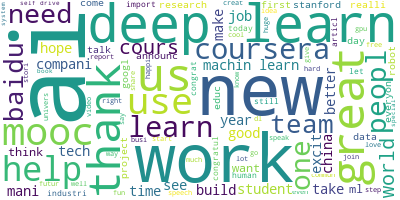

In [93]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(tweets['tweet_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

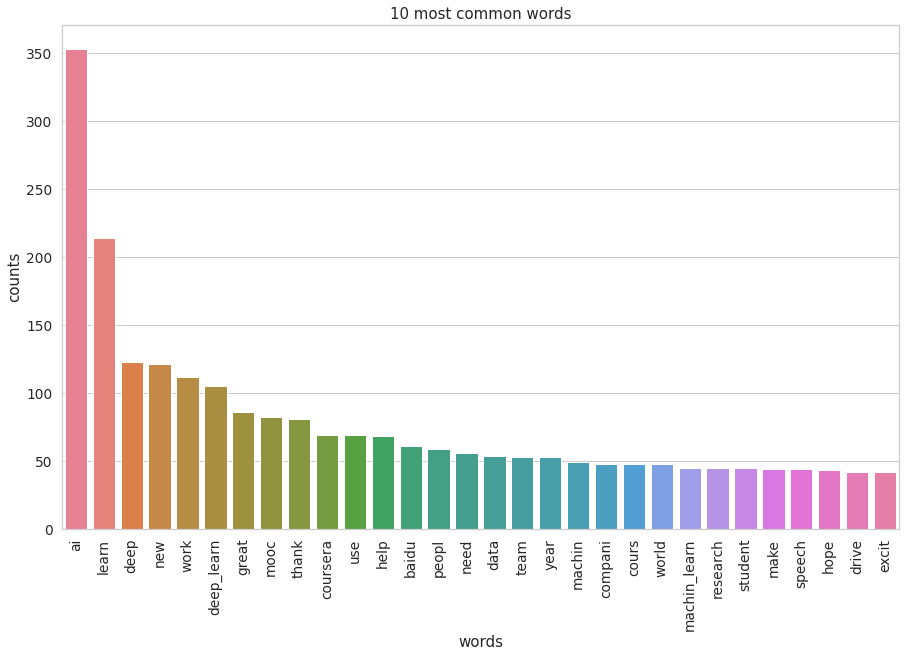

In [56]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:30]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(tweets['tweet_text_processed'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [34]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)


Topics found via LDA:

Topic #0:
ai learn great baidu work help coursera deep mooc new

Topic #1:
learn ai work new deep_learn deep thank data great drive

Topic #2:
ai learn new coursera mooc deep cours thank deep_learn need

Topic #3:
ai learn new great team machin machin_learn work peopl mooc

Topic #4:
learn deep deep_learn ai work peopl year new use great


In [40]:

from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
import os
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+ str(number_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
    with open(LDAvis_data_filepath, 'wb') as f:
            pickle.dump(LDAvis_prepared, f)

    # load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath) as f:
    LDAvis_prepared = pickle.load([line.encode('utf-8').strip() for line in f])
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte

In [43]:
!pip install rake-nltk


  Created wheel for rake-nltk: filename=rake_nltk-1.0.4-py2.py3-none-any.whl size=7819 sha256=1d7c32f7ec191a44e294a62923ad8144b3bf4a9c448eb357a58c6c881d6b48d7
  Stored in directory: /home/hustle/.cache/pip/wheels/ad/4f/6b/a5e7778f5c084d8b7c2c5fe9d37eb806f5ff5fee5e8ee17342
Successfully built rake-nltk


In [63]:
long_string = ','.join(list(tweets['tweet_text_processed'].values))


----- 10 most common 1-grams -----
ai: 347
learning: 181
deep: 123
new: 121
great: 85
us: 84
work: 75
coursera: 66
baidu: 61
people: 59

----- 10 most common 2-grams -----
deep learning: 105
machine learning: 45
self driving: 20
landing ai: 18
big data: 12
deep speech: 11
learning mooc: 11
face recognition: 10
autonomous driving: 10
looking forward: 9

----- 10 most common 3-grams -----
machine learning mooc: 11
ai transformation playbook: 6
self driving cars: 6
using deep learning: 6
ai new electricity: 6
self driving car: 5
learning poster session: 5
machine learning class: 5
you ll learn: 4
deep learning specialization: 4

Took 0.068 seconds
